# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Linear regression using the Normal Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

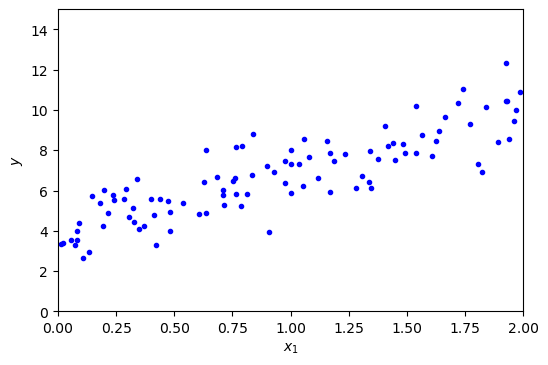

In [3]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")
ax.set(xlabel="$x_1$", ylabel="$y$")

xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.show()

In [4]:
X_b = np.stack([np.ones((100, 1)), X], axis=1)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.90723455],
       [3.00747468]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.stack([np.ones((2, 1)), X_new],
                   axis=1)  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.90723455],
       [9.92218391]])

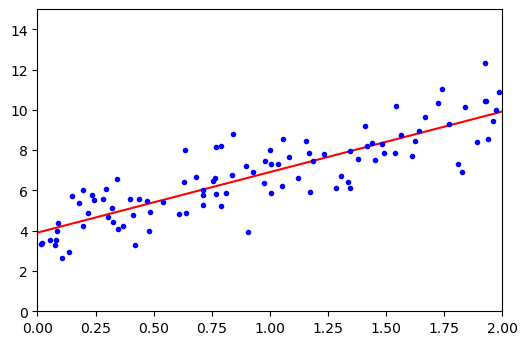

In [7]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X_new, y_predict, "r-")
ax.plot(X, y, "b.")
xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.show()

The figure in the book actually corresponds to the following code, with a legend and axis labels:

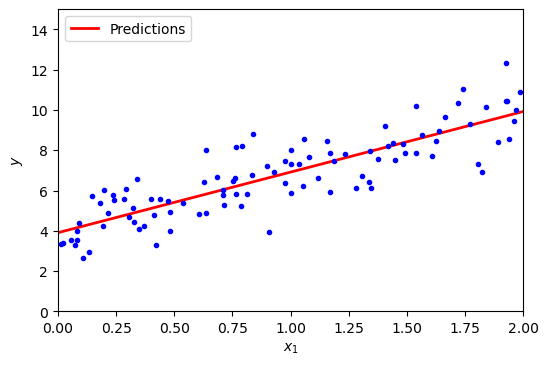

In [8]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
ax.plot(X, y, "b.")
xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlabel="$x_1$", ylabel="$y$", xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.legend(loc="upper left", fontsize='medium')

plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90723455]), array([[3.00747468]]))

In [10]:
lin_reg.predict(X_new)

array([[3.90723455],
       [9.92218391]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.90723455],
       [3.00747468]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.90723455],
       [3.00747468]])

# Linear regression using batch gradient descent

In [13]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[3.90723455],
       [3.00747468]])

In [15]:
X_new_b.dot(theta)

array([[3.90723455],
       [9.92218391]])

In [16]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, ax, theta_path=None):
    m = len(X_b)
    ax.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    xmin, xmax, ymin, ymax = [0, 2, 0, 15]
    ax.set(xlabel="$x_1$",
           xlim=(xmin, xmax),
           ylim=(ymin, ymax),
           title=f"$\eta = {eta}$")

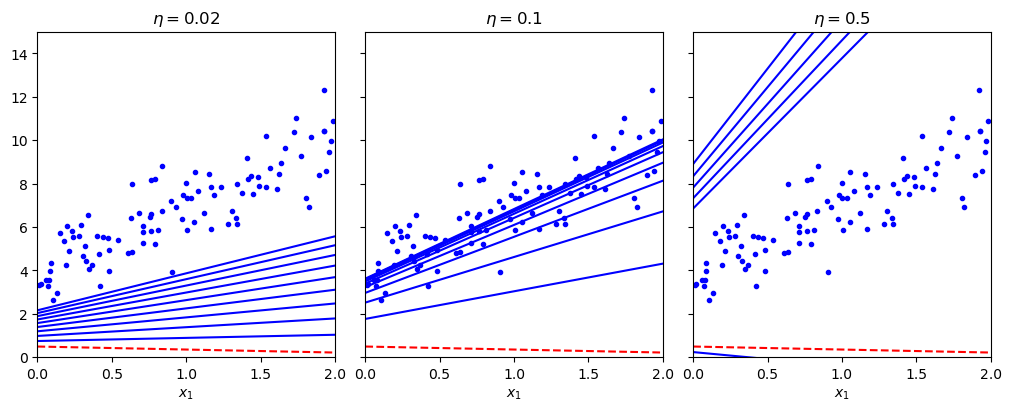

In [17]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

_, axes = plt.subplots(1,
                       3,
                       figsize=(10, 4),
                       dpi=100,
                       sharey=True,
                       constrained_layout=True)

etas = [.02, .1, .5]
theta_paths = [None, theta_path_bgd, None]

for ax, eta, theta_path in zip(axes.flatten(), etas, theta_paths):
    plot_gradient_descent(theta, eta=eta, ax=ax, theta_path=theta_path)

plt.show()

# Stochastic Gradient Descent

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

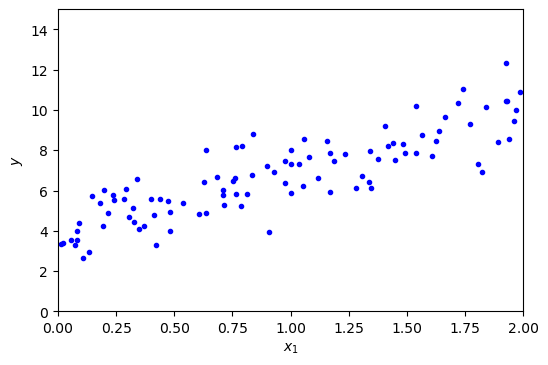

In [19]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"  
            ax.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X, y, "b.")

xmin, xmax, ymin, ymax = [0, 2, 0, 15]
ax.set(xlabel="$x_1$",
       ylabel="$y$",
       xlim=(xmin, xmax),
       ylim=(ymin, ymax))

plt.show()

In [20]:
theta

array([[3.81218458],
       [3.09133067]])

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,
                       tol=1e-3,
                       penalty=None,
                       eta0=0.1,
                       random_state=42)
sgd_reg.fit(X, y.flatten())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97217689]), array([3.07858559]))

# Mini-batch gradient descent

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta -= eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.01825657],
       [3.14556535]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

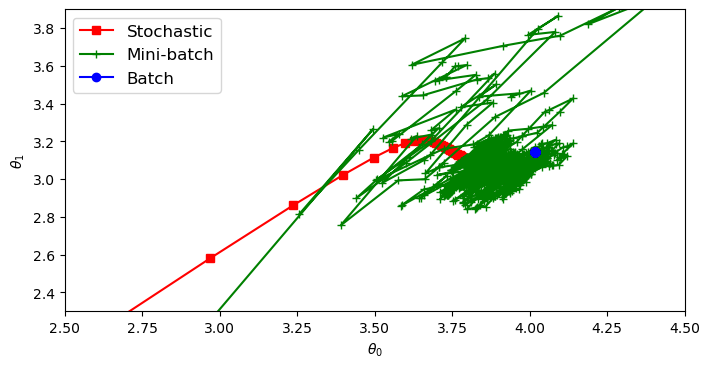

In [26]:
_, ax = plt.subplots(figsize=(8, 4), dpi=100)

theta_paths = [theta_path_bgd, theta_path_sgd, theta_path_mgd]
styles = ["r-s", "g-+", "b-o"]
labels = ["Stochastic", "Mini-batch", "Batch"]

for thetas, style, lb in zip(theta_paths, styles, labels):
    ax.plot(thetas[:, 0], thetas[:, 1], style, label=lb)

ax.legend(loc="upper left", fontsize='large')

xmin, xmax, ymin, ymax = [2.5, 4.5, 2.3, 3.9]
ax.set(xlabel=r"$\theta_0$",
       ylabel=r"$\theta_1$",
       xlim=(xmin, xmax),
       ylim=(ymin, ymax))

plt.show()